In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
random_state = 2
pd.set_option('display.max_rows', 200)

In [4]:
file_name = "../data/raw/bank-customer-churn-prediction.csv"

In [5]:
df = pd.read_csv(file_name)

## Initial Data Assessment

Do BEFORE splitting:
- Basic data inspection - shape, column names, data types
- Check for missing values - counts/percentages of NAs
- Identify obvious data quality issues - duplicates, impossible values
- Understand the target distribution - check class imbalance

In [7]:
df.shape

(10000, 12)

In [11]:
df.sample(8, random_state=random_state).T

,7878,3224,1919,4432,4835,4895,7269,1451
customer_id,15760456,15713463,15739858,15751193,15590623,15589435,15675926,15684198
credit_score,731,645,618,621,561,784,655,551
country,France,Germany,France,Spain,Spain,France,Germany,France
gender,Female,Female,Male,Male,Male,Male,Male,Female
age,38,41,56,33,34,31,34,38
tenure,10,2,7,4,4,7,7,10
balance,123711.73,138881.04,0.0,0.0,85141.79,0.0,118028.35,0.0
products_number,2,1,1,2,2,2,1,2
credit_card,1,1,1,1,1,1,1,1
active_member,0,0,1,1,1,1,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Missing values

In [13]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Identify obvious quality issues
Check duplicates, impossible values

In [35]:
number_of_duplicated_rows = df.duplicated().value_counts()
number_of_duplicated_rows

False    10000
Name: count, dtype: int64

In [36]:
number_of_duplicated_rows_by_customer_id = df["customer_id"].duplicated().value_counts()
number_of_duplicated_rows_by_customer_id

customer_id
False    10000
Name: count, dtype: int64

In [33]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


### Target distribution

In [15]:
df["churn"].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

## EDA

In [39]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.to_list()

In [52]:
categorical_columns = df.select_dtypes(include=["object", "category"]).columns.to_list()

### Numerical destributions

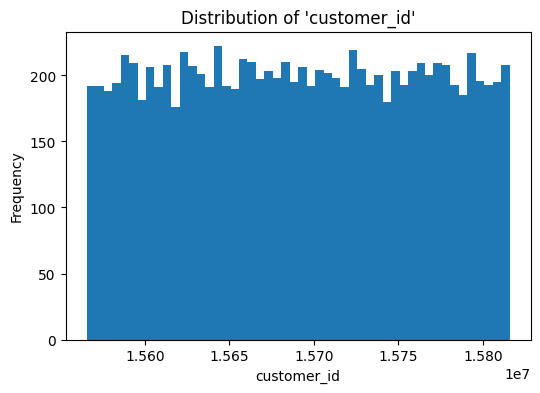

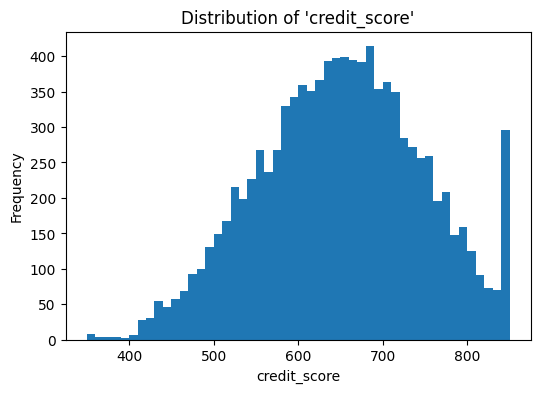

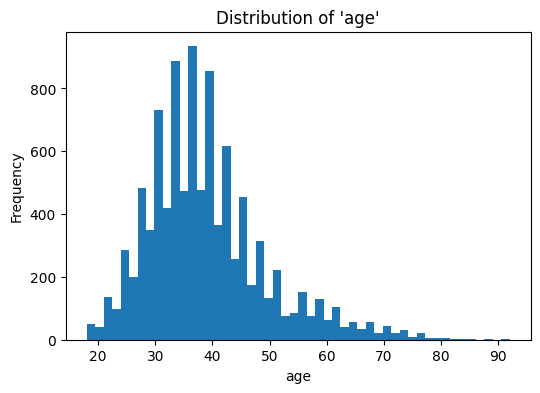

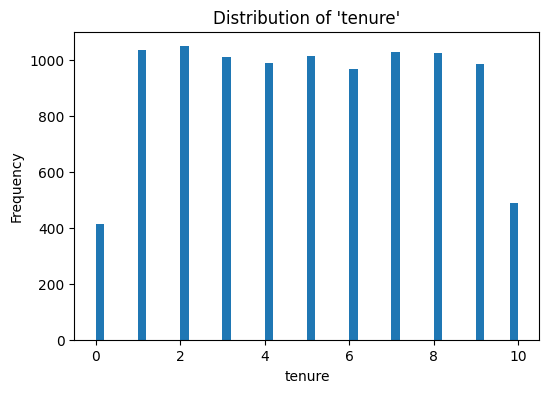

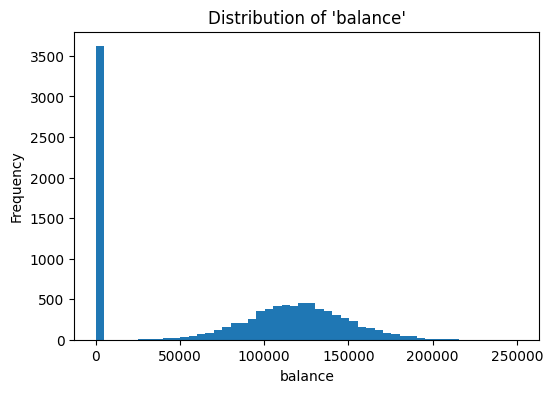

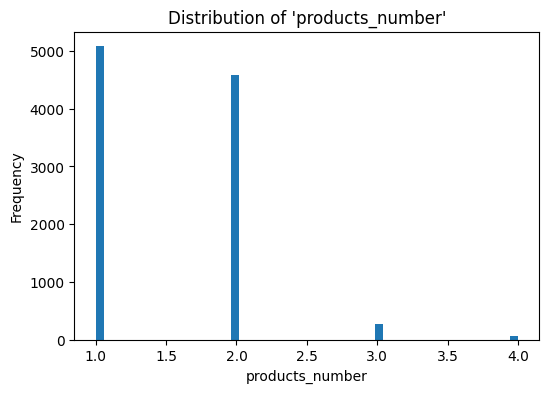

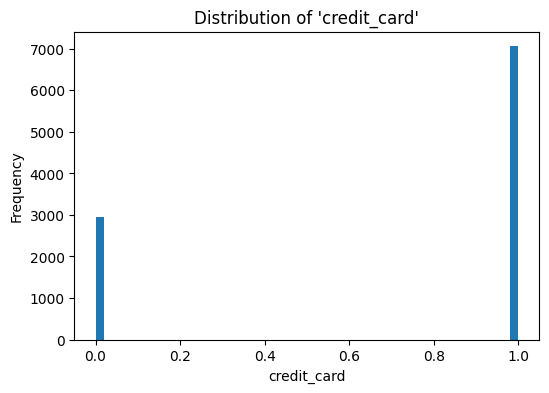

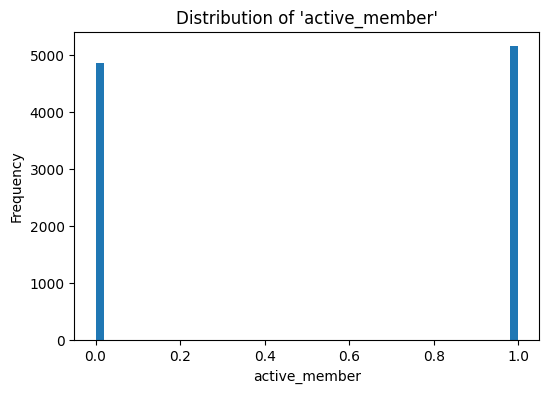

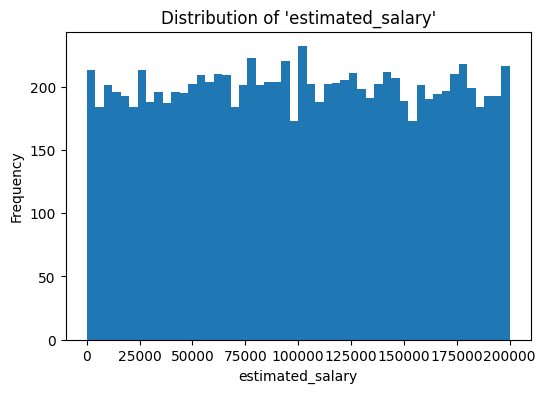

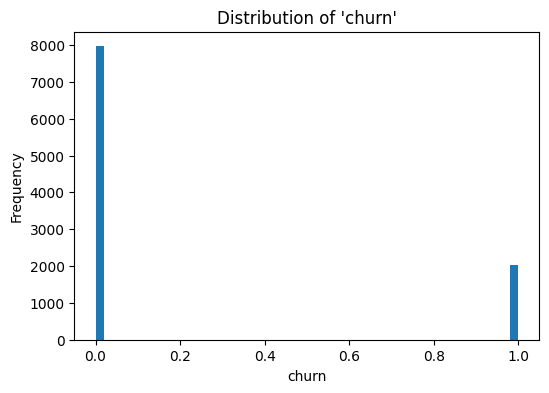

In [44]:
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### The outcome
It makes sense to create extra column "balance_exists". For 3,5k+ rows the value of this column will be `False`

### Boxplots for outlier detection

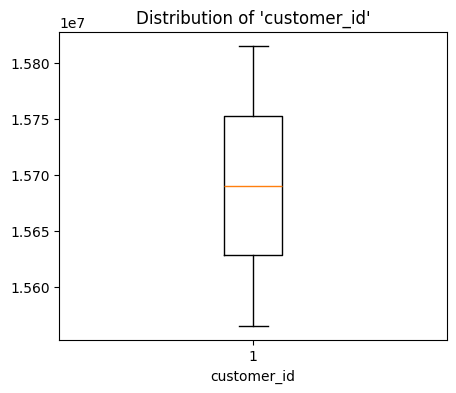

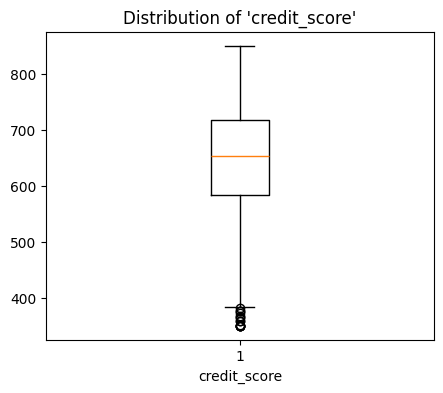

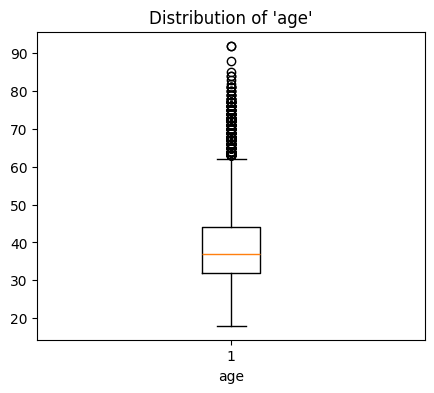

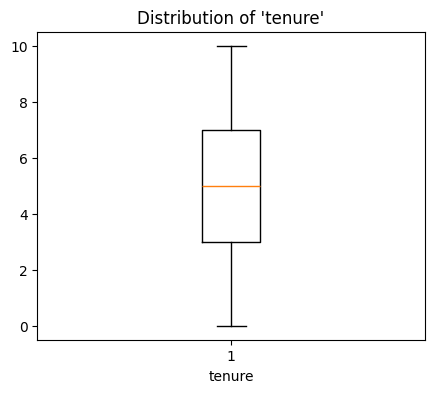

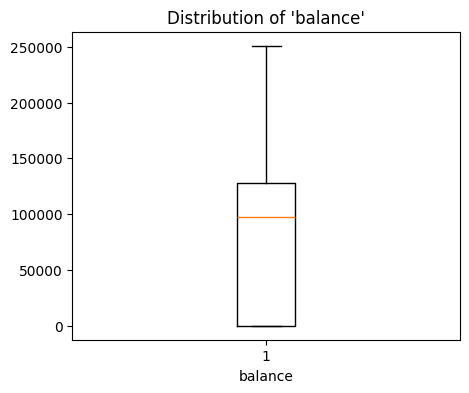

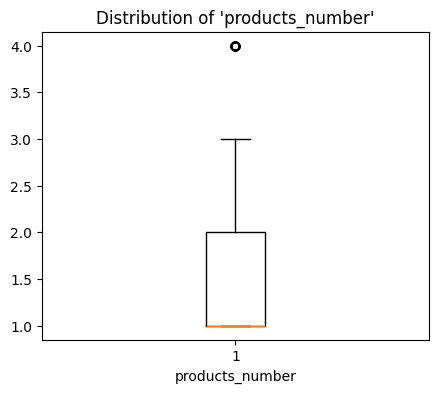

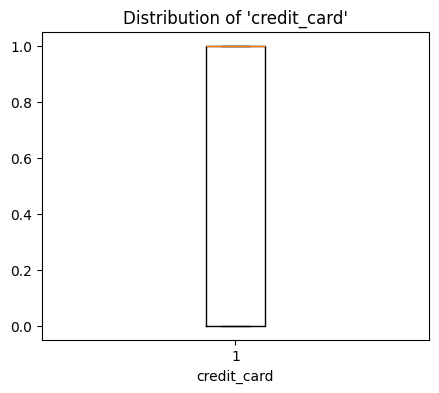

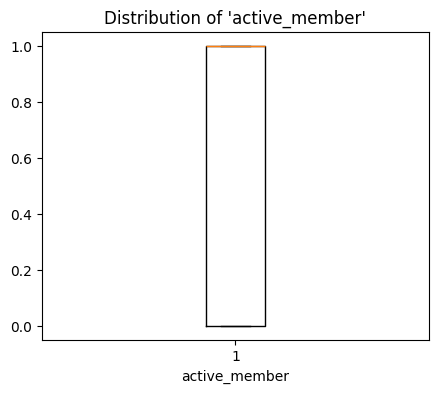

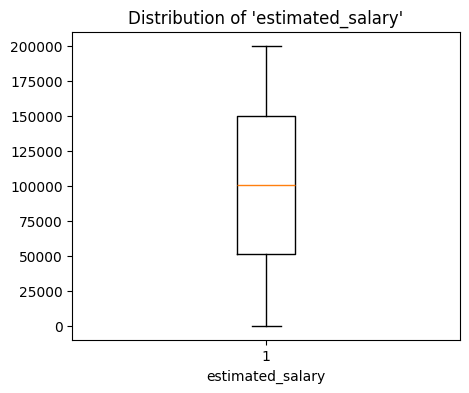

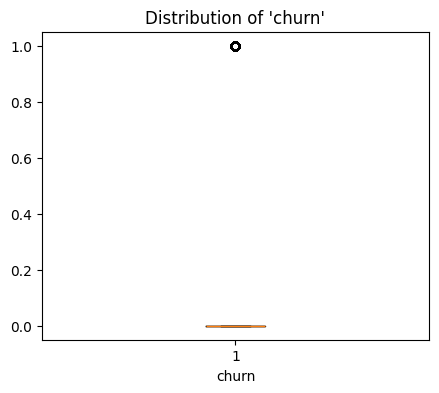

In [51]:
for col in numerical_columns:
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col], vert=True)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.show()

### Categorical feature analysis

Value counts for country:
 country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


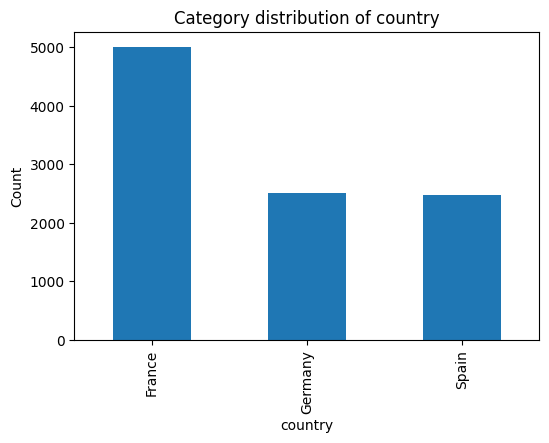

Value counts for gender:
 gender
Male      5457
Female    4543
Name: count, dtype: int64


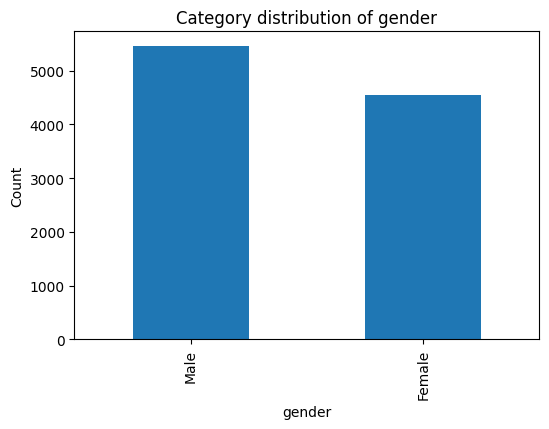

In [55]:
for col in categorical_columns:
    print(f"Value counts for {col}:\n", df[col].value_counts())

    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Category distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Split the dataset
To avoid data leakage we need to split our dataset. If we calculate the mean of a column, we need to do it against train dataset only.

Let's store `customer_id` for debugging purposes and error analysis.

In [18]:
customer_ids = df["customer_id"]

In [22]:
X = df.drop(["customer_id", "churn"], axis=1)
y = df["churn"]

In [24]:
# Split everything with the same indices
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, customer_ids,
    test_size=0.2,
    random_state=random_state,
    stratify=y
)

In [31]:
X_train.sample(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
8085,794,France,Male,33,0,0.00,2,0,0,178122.71
1463,517,France,Male,37,5,113308.84,1,0,1,31517.16


## The Problem

If you manually do transformations:


In [ ]:
# During training
X_train['country_germany'] = (X_train['country'] == 'Germany').astype(int)
mean_age = X_train['age'].mean()
X_train['age'].fillna(mean_age, inplace=True)

# During evaluation - you must remember to:
X_test['country_germany'] = (X_test['country'] == 'Germany').astype(int)
X_test['age'].fillna(mean_age, inplace=True)  # Use TRAIN mean!



This is error-prone and hard to maintain.

## Recommended Approach: Sklearn Pipelines



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Define column groups
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
categorical_features = ['country', 'gender']
binary_features = ['products_number', 'credit_card', 'active_member']

# Create transformers for each type
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features)  # Already 0/1
    ],
    remainder='drop'  # Drop any columns not specified
)

# Fit on training data ONLY
preprocessor.fit(X_train)

# Transform both sets using the SAME fitted values
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)



## Full Pipeline with Model



In [ ]:
from sklearn.linear_model import LogisticRegression

# Combine preprocessing + model into one pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=random_state))
])

# Fit everything at once
full_pipeline.fit(X_train, y_train)

# Evaluate - transformations applied automatically
score = full_pipeline.score(X_test, y_test)
predictions = full_pipeline.predict(X_test)



## Custom Transformations (like your `country_germany` example)



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CountryFeatureCreator(BaseEstimator, TransformerMixin):
    """Create binary country features"""
    
    def fit(self, X, y=None):
        # Learn nothing, just return self
        return self
    
    def transform(self, X):
        X = X.copy()
        X['country_germany'] = (X['country'] == 'Germany').astype(int)
        X['country_france'] = (X['country'] == 'France').astype(int)
        return X

# Use in pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('feature_creator', CountryFeatureCreator()),
    ('preprocessor', preprocessor)
])



## Benefits of This Approach

| Benefit | Description |
|---------|-------------|
| **No data leakage** | Test set transformed with train statistics |
| **Reproducible** | Same pipeline for training/evaluation/production |
| **Portable** | Save pipeline with `joblib.dump(full_pipeline, 'model.pkl')` |
| **Less bugs** | No manual tracking of transformation steps |

## Your Workflow Should Be:

1. **EDA on X_train** → Discover insights
2. **Design transformations** → Based on EDA findings
3. **Build Pipeline** → Encode all transformations
4. **Fit on X_train** → Learn parameters
5. **Evaluate on X_test** → Apply same transformations automatically

Would you like me to help structure your notebook with this pipeline approach?